In [2]:
#(1) 데이터 가져오기
#sklearn.datasets의 load_diabetes에서 데이터를 가져와주세요.
#diabetes의 data를 df_X에, target을 df_y에 저장해주세요.
from sklearn.datasets import load_diabetes

diabetes=load_diabetes()
df_X = diabetes['data']
df_y = diabetes['target']

In [12]:
#(2) 모델에 입력할 데이터 X 준비하기
#df_X에 있는 값들을 numpy array로 변환해서 저장해주세요.
import numpy as np
df_X = np.array(df_X)
print(df_X.shape)

(442, 10)


In [11]:
#(3) 모델에 예측할 데이터 y 준비하기
#df_y에 있는 값들을 numpy array로 변환해서 저장해주세요.
df_y = np.array(df_y)
print(df_y.shape)

(442,)


In [8]:
#(4) train 데이터와 test 데이터로 분리하기
#X와 y 데이터를 각각 train 데이터와 test 데이터로 분리해주세요.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=42)

In [13]:
#(5) 모델 준비하기
#입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.
#모델 함수를 구현해주세요.
W = np.random.rand(10)
b = np.random.rand()

In [16]:
#(6) 손실함수 loss 정의하기
#손실함수를 MSE 함수로 정의해주세요.

def MSE(a, b):
    mse = ((a - b) ** 2).mean() 
    return mse

def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L


losses = []

In [20]:
#(7) 기울기를 구하는 gradient 함수 구현하기
#기울기를 계산하는 gradient 함수를 구현해주세요.
def model(X, W, b):
    predictions = 0
    for i in range(len(W)):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

def gradient(X, W, b, y):
    N = len(W)
    y_pred = model(X, W, b)
    dW = 1/N * 2 * X.T.dot(y_pred - y)
    db = 2 * (y_pred - y).mean()
    return dW, db

In [31]:
#(8) 하이퍼 파라미터인 학습률 설정하기
#학습률, learning rate 를 설정해주세요
#만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요.
LEARNING_RATE = 0.005

Iteration 10 : Loss 4551.5661
Iteration 20 : Loss 4470.6028
Iteration 30 : Loss 4399.0032
Iteration 40 : Loss 4335.2629
Iteration 50 : Loss 4278.1423
Iteration 60 : Loss 4226.6186
Iteration 70 : Loss 4179.8466
Iteration 80 : Loss 4137.1274
Iteration 90 : Loss 4097.8814
Iteration 100 : Loss 4061.6276
Iteration 110 : Loss 4027.9655
Iteration 120 : Loss 3996.5611
Iteration 130 : Loss 3967.1349
Iteration 140 : Loss 3939.4526
Iteration 150 : Loss 3913.3168
Iteration 160 : Loss 3888.5607
Iteration 170 : Loss 3865.0429
Iteration 180 : Loss 3842.6431
Iteration 190 : Loss 3821.2579
Iteration 200 : Loss 3800.7988
Iteration 210 : Loss 3781.1892
Iteration 220 : Loss 3762.3625
Iteration 230 : Loss 3744.2604
Iteration 240 : Loss 3726.8318
Iteration 250 : Loss 3710.0316
Iteration 260 : Loss 3693.8196
Iteration 270 : Loss 3678.1599
Iteration 280 : Loss 3663.0203
Iteration 290 : Loss 3648.3717
Iteration 300 : Loss 3634.1877
Iteration 310 : Loss 3620.4442
Iteration 320 : Loss 3607.1190
Iteration 330 : L

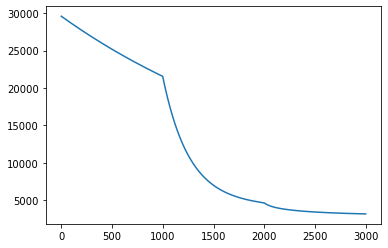

In [32]:
#(9) 모델 학습하기
#정의된 손실함수와 기울기 함수로 모델을 학습해주세요.
#loss값이 충분히 떨어질 때까지 학습을 진행해주세요.
#입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요.

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [35]:
#(10) test 데이터에 대한 성능 확인하기
#test 데이터에 대한 성능을 확인해주세요.
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse
#MSE 손실함수값 3000 이하를 달성

2871.882089238878

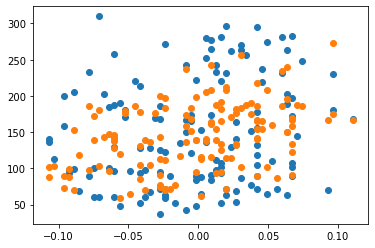

In [34]:
#(11) 정답 데이터와 예측한 데이터 시각화하기
#x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해 주세요.
plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], prediction, label="pred")
plt.show()